## Profile Likelihood Example

In this example we compute an interval using the Profile Likelihood method. 

$$ \lambda ( \mu ) = \frac{ L ( x | \mu, \hat{ \hat { \nu } } ) } { L ( x | \hat{\mu}, \hat{\nu } ) }  $$  

The interval is computed using the asymptotic propriety of $\lambda(\mu)$ based on Wilk's theorem: 

-  $-2 \log { \lambda (\mu ) } $ is distributed as a $\chi^2$ with 1 degree of freedom

In [1]:
using namespace RooStats;

In [2]:
RooStats::LikelihoodInterval * interval = nullptr;
RooStats::LikelihoodIntervalPlot * plot = nullptr; 

##### 1. Reading the model (Workspace) from input file

First part is just to access the workspace file and retrieve the model and the data 

In [3]:
//TString fileName = "CountingModelVaryingB.root";
//TString fileName = "PoissonModel.root";
TString fileName = "HiggsBinModel.root";
TString workspaceName = "w";
TString modelConfigName = "ModelConfig";
TString dataName = "data";
TString integrationType = "";  

In [4]:
auto file = TFile::Open(fileName);


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [5]:
auto w =  (RooWorkspace*) file->Get(workspaceName);
w->Print();
auto mc = (RooStats::ModelConfig*) w->obj(modelConfigName);
auto  data = w->data(dataName);
auto poi = (RooRealVar*) mc->GetParametersOfInterest()->first();  // get POI 


RooWorkspace(w) w contents

variables
---------
(a1,a2,mass,nbackground,nsignal,width,x)

p.d.f.s
-------
RooExponential::bmodel[ x=z c=1 ] = 0.000354025
RooAddPdf::model[ nbackground * bmodel + nsignal * smodel ] = 0.000350859
RooGaussian::smodel[ x=x mean=mass sigma=width ] = 1.8233e-12

functions
--------
RooFormulaVar::z[ actualVars=(a1,a2,x) formula="-(a1*x/100.+a2*(x/100.)^2)" ] = -7.94614

datasets
--------
RooDataHist::data(x)

named sets
----------
ModelConfig_NuisParams:(a1,a2,nbackground)
ModelConfig_Observables:(x)
ModelConfig_POI:(nsignal)
nuisParams:(a1,a2,nbackground)

generic objects
---------------
RooStats::ModelConfig::ModelConfig



In [6]:
// This is only for debugging
std::cout << "number of observed events in the data : " << std::endl;
auto args = data->get(0);
if (args) args->Print("V");
else  Error("LikelihoodLimit","Input data does not contain any event");
//std::cout << "number of background events " << w->var("b")->getVal() << std::endl;

number of observed events in the data : 
  1) RooRealVar:: x = 110.25


#### 2. Create and configure `ProfileLikelihoodCalculator` class

In [7]:
RooStats::ProfileLikelihoodCalculator plCalc(*data,*mc);

Set the Confidence Level for the interval (e.g 0.95 for a 95% interval)

In [8]:
plCalc.SetConfidenceLevel(0.90);

#### 3. Compute the interval

Run the calculator by performing the unconditional and conditional fits (profiling the nuisance parameters)

In [9]:
interval = plCalc.GetInterval();

[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bmodel_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#0] PROGRESS:Minization -- ProfileLikelihoodCalcultor::DoGLobalFit - find MLE 
[#0] PROGRESS:Minization -- ProfileLikelihoodCalcultor::DoMinimizeNLL - using Minuit / Migrad with strategy 1
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bmodel_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (smodel)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (bmodel)
[#1] INFO:Minization -- 
  RooFitResult: minimized FCN value: -170114, estimated distance to minimum: 1.17014e-05
             

In [10]:
lowerLimit = interval->LowerLimit(*poi);
upperLimit = interval->UpperLimit(*poi);

In [11]:
cout << 100*plCalc.ConfidenceLevel() << "% interval is : ["<< lowerLimit << ", "<< upperLimit <<"] "<<endl;

90% interval is : [154.69, 397.939] 


#### 4. Visualize the Interval

In [14]:
plot = new RooStats::LikelihoodIntervalPlot(interval);
//plot->SetNPoints(50);   // if plotting takes a long time
plot->SetRange(0,1000);

.........................................................

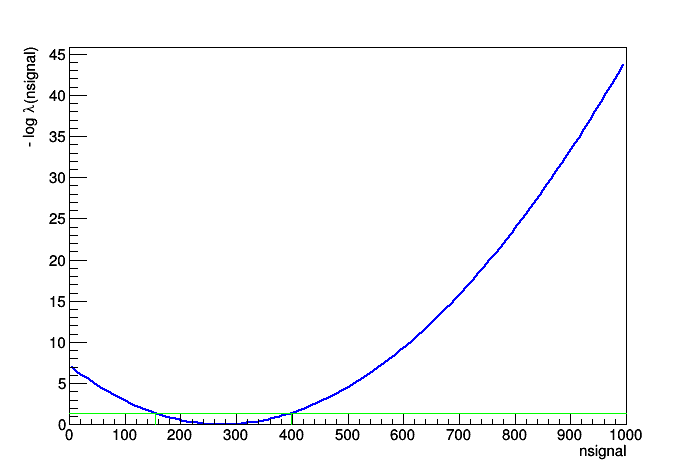

.............................................

In [15]:
plot->Draw("TF1"); gPad->Draw();